# MFCC
* mfcc([y, sr, S, n_mfcc, dct_type, norm, lifter])
* librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
* MFCC : Mel Spectrum(멜 스펙트럼)에서 Cepstral(켑스트럴) 분석을 통해 추출된 값


    y : np.ndarray [shape=(n,)] or None | 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것
    sr : number > 0 [scalar] | 샘플링레이트,  1초당 샘플의 개수, 단위 Hz 또는 kHz
    S : np.ndarray [shape=(d, t)] or None | log-power Mel spectrogram (뭔지 모르겠어요..)
    n_mfcc : int > 0 [scalar] | MFCC 아웃풋 개수
    dct_type : {1, 2, 3} | Discrete cosine transform (DCT) 이산 코사인 변환
    norm : None or ‘ortho’ | 정규화, dct_type이 2 혹은 3일 때만 정규화를 지원한다.
    lifter : number >= 0 | 숫자가 클수록 선형에 가까워진다.
    kwargs : 추가적인 arguments

---------------------------

In [1]:
# 주형's voice
import librosa
y, sr = librosa.load('../../nmb_data/teamvoice/testvoice_M2.wav')

# 2D 음파 그래프
librosa.display.waveplot(y=y, sr=sr)

* y : 시간 순서대로 나열된 오디오 파일
* sr : samplig rate

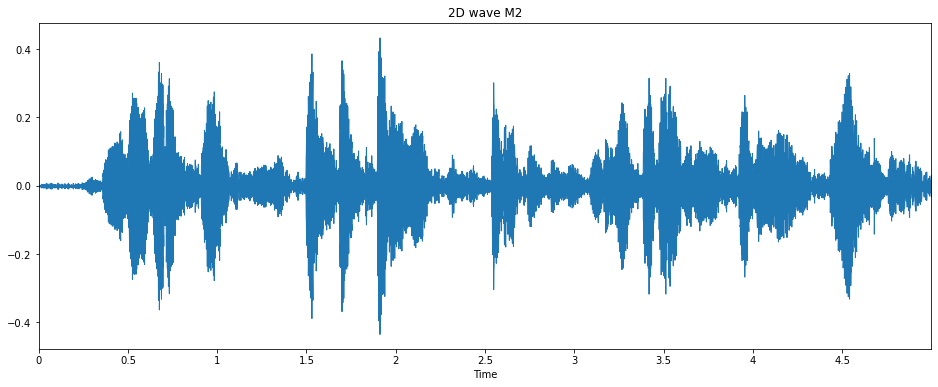

In [2]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(16,6))
plt.title('2D wave M2')
librosa.display.waveplot(y=y, sr=sr)
plt.show()

# 가로 : 시간
# 세로 : 오디오의 세기

---------------------

# MFCCS

In [3]:
# 전처리
import sklearn
def normalize(x, axis=0) : 
    return sklearn.preprocessing.minmax_scale(x, axis=axis) # 전처리 Minmaxsclaer

## 디폴트

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


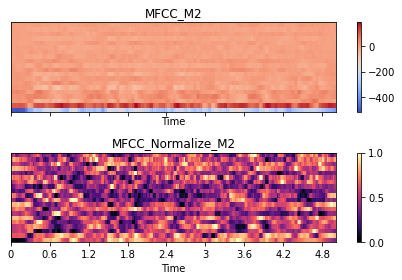

In [4]:
# 디폴트 값

mfccs1 = librosa.feature.mfcc(y=y, sr=sr)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC_M2')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC_Normalize_M2')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


## hop_length

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


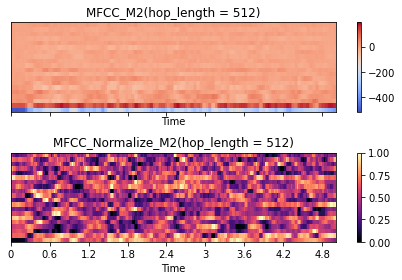

In [8]:
# hop_length = 512

mfccs1 = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, htk=True)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr))

print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC_M2(hop_length = 512)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC_Normalize_M2(hop_length = 512)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 862)
mfccs1_norm.shape :  (20, 862)


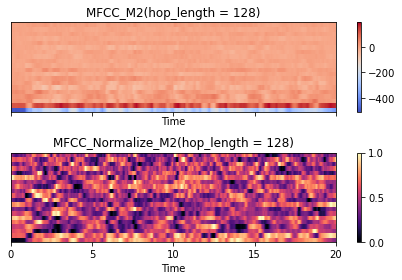

In [9]:
# hop_length = 128

mfccs1 = librosa.feature.mfcc(y=y, sr=sr, hop_length=128, htk=True)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 

print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC_M2(hop_length = 128)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC_Normalize_M2(hop_length = 128)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 108)
mfccs1_norm.shape :  (20, 108)


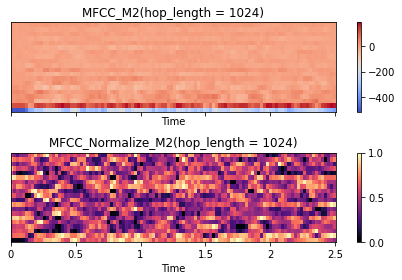

In [10]:
# hop_length = 1024

mfccs1 = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 

print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC_M2(hop_length = 1024)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC_Normalize_M2(hop_length = 1024)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


## n_fft

C:\Users\nammr\Anaconda3\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(
y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


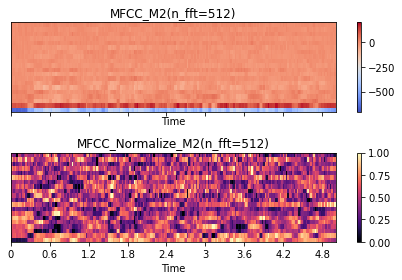

In [11]:
# n_fft = 512

mfccs1 = librosa.feature.mfcc(y=y, sr=sr, n_fft=512, htk=True)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 

print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC_M2(n_fft=512)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC_Normalize_M2(n_fft=512)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


C:\Users\nammr\Anaconda3\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(
y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


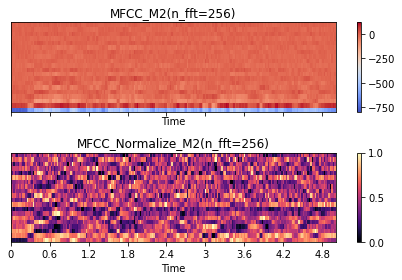

In [12]:
# n_fft = 256

mfccs1 = librosa.feature.mfcc(y=y, sr=sr, n_fft=256, htk=True)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 

print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC_M2(n_fft=256)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC_Normalize_M2(n_fft=256)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


C:\Users\nammr\Anaconda3\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(
y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


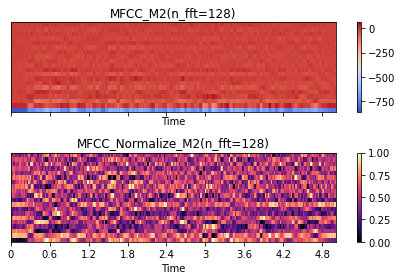

In [13]:
# n_fft = 128

mfccs1 = librosa.feature.mfcc(y=y, sr=sr, n_fft=128, htk=True)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 

print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC_M2(n_fft=128)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC_Normalize_M2(n_fft=128)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


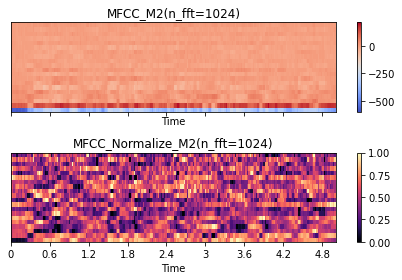

In [14]:
# n_fft = 1024

mfccs1 = librosa.feature.mfcc(y=y, sr=sr, n_fft=1024, htk=True)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 

print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC_M2(n_fft=1024)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC_Normalize_M2(n_fft=1024)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


----------------

# 그 외 파라미터 튜닝

## n_mfcc

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (40, 216)
mfccs1_norm.shape :  (40, 216)


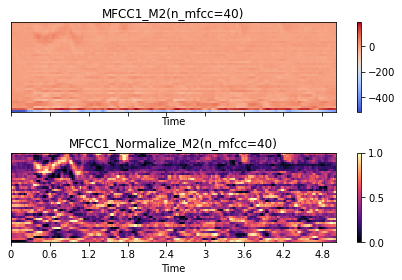

In [15]:
# n_mfcc=40

mfccs1 = librosa.feature.mfcc(y=y, sr=sr,  n_mfcc=40)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC1_M2(n_mfcc=40)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC1_Normalize_M2(n_mfcc=40)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (10, 216)
mfccs1_norm.shape :  (10, 216)


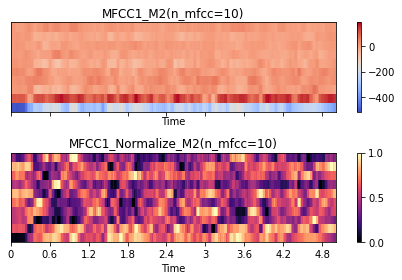

In [16]:
# n_mfcc=10

mfccs1 = librosa.feature.mfcc(y=y, sr=sr,  n_mfcc=10)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC1_M2(n_mfcc=10)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC1_Normalize_M2(n_mfcc=10)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


## dct_type

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


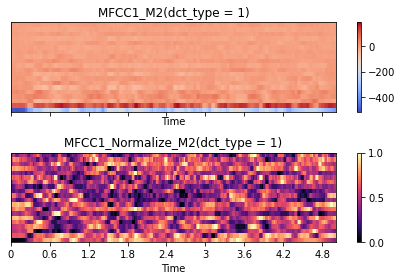

In [17]:
# dct_type = 1

mfccs1 = librosa.feature.mfcc(y=y, sr=sr,  dct_type = 1)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC1_M2(dct_type = 1)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC1_Normalize_M2(dct_type = 1)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


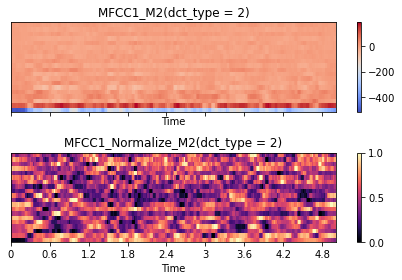

In [18]:
# dct_type = 2

mfccs1 = librosa.feature.mfcc(y=y, sr=sr,  dct_type = 2)  # default
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC1_M2(dct_type = 2)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC1_Normalize_M2(dct_type = 2)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


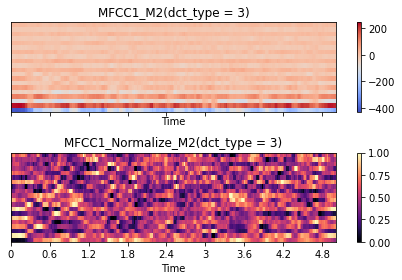

In [19]:
# dct_type = 3

mfccs1 = librosa.feature.mfcc(y=y, sr=sr,  dct_type = 3)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC1_M2(dct_type = 3)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC1_Normalize_M2(dct_type = 3)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


## lifter

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


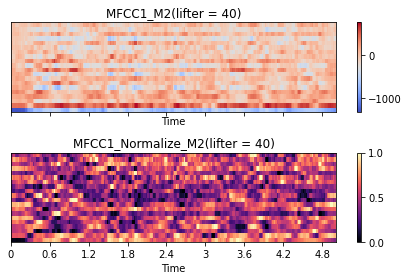

In [20]:
# lifter = 40

mfccs1 = librosa.feature.mfcc(y=y, sr=sr,  n_mfcc=20, lifter = 40)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC1_M2(lifter = 40)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC1_Normalize_M2(lifter = 40)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()


y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
mfccs1.shape :  (20, 216)
mfccs1_norm.shape :  (20, 216)


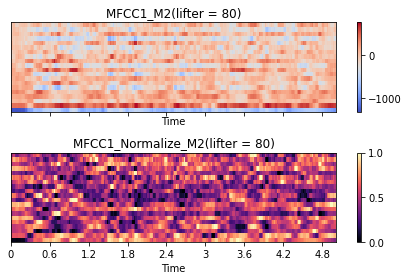

In [21]:
# lifter = 80

mfccs1 = librosa.feature.mfcc(y=y, sr=sr,  n_mfcc=20, lifter = 80)
mfccs1_norm = normalize(mfccs1, axis=1)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("mfccs1.shape : ", mfccs1.shape)
print("mfccs1_norm.shape : ", mfccs1_norm.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img1 = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])    # default MFCCs
ax[0].set(title='MFCC1_M2(lifter = 80)')
fig.colorbar(img1, ax=ax[0])

img2 = librosa.display.specshow(mfccs1_norm, x_axis='time', ax=ax[1])   # default + normalize MFCCs
ax[1].set(title='MFCC1_Normalize_M2(lifter = 80)')
fig.colorbar(img2, ax=ax[1])

plt.tight_layout()
plt.show()
